# 1.1 PyTorch Basics

# Table of Contents

- #### 1.1. Basic autograd example 1
- #### 1.2. Basic autograd example 2
- #### 1.3. Loading data from numpy
- #### 1.4. Implementing the input pipline
- #### 1.5. Input pipline for custom dataset
- #### 1.6. Using pretrained model
- #### 1.7. Save and load model 




### (0. Imports)

Let's import torch, torchvision and some of their packages as seen previously

In [ ]:
import torch 
import torch.nn as nn
import torch.utils.data as data

from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets

import numpy as np
# we also import pyplot and let jupyter shows our plots with 
# the magic command %matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Basic autograd example 1


Gradient Checking. When we perform some operation with variables (requiring gradients) and then we call **.backward()** on a scalar variable, the gradients w.r.t. the variable for which we call the **.backward()** method, get stored in **.grad**. We can thus inspect it by i.e. printing it.

In [23]:
# Create tensors.
x = Variable(torch.Tensor([1]), requires_grad=True)
w = Variable(torch.Tensor([2]), requires_grad=True)
b = Variable(torch.Tensor([3]), requires_grad=True)

# Build a computational graph.
y = w * x + b    # y = 2 * x + 3
print(x.grad)
print(w.grad)
print(b.grad)

None
None
None


In [ ]:
print('')

In [24]:
# Compute gradients.
y.backward()

# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 

Variable containing:
 2
[torch.FloatTensor of size 1]

Variable containing:
 1
[torch.FloatTensor of size 1]

Variable containing:
 1
[torch.FloatTensor of size 1]



## 2. Basic autograd example 2



## 2. Basic autograd example 2

Let's perform some more complex operations with our variables. What happens during an optimization step??

In [25]:
# Create tensors.
x = Variable(torch.randn(5, 3))
y = Variable(torch.randn(5, 2))

# Build a linear layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

w:  Parameter containing:
 0.4557 -0.3683  0.5056
 0.4284  0.3456  0.3068
[torch.FloatTensor of size 2x3]

b:  Parameter containing:
 0.1057
-0.0223
[torch.FloatTensor of size 2]



In [26]:
# Build Loss and Optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# Forward propagation.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.data[0])

loss:  1.9578657150268555


In [27]:
# Backpropagation.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad)  
print ('dL/db: ', linear.bias.grad)

dL/dw:  Variable containing:
 1.5386 -0.3293 -0.1792
 0.1635 -0.3448  1.3107
[torch.FloatTensor of size 2x3]

dL/db:  Variable containing:
-0.6740
 0.3270
[torch.FloatTensor of size 2]



In [28]:
# 1-step Optimization (gradient descent).
optimizer.step()

# You can also do optimization at the low level as shown below.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after optimization.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.data[0])

loss after 1 step optimization:  1.9089889526367188


## 3. Loading data from numpy

## 3. Loading data from numpy

Numpy arrays and Torch's Tensors shares the same data, so that we can pass from and to eachother almost costlessly, for example:

In [ ]:
a = np.array([[1,2], [3,4]])
b = torch.from_numpy(a)      # convert numpy array to torch tensor
c = b.numpy()                # convert torch tensor to numpy array

<img style="height: 400px;" src="../imgs/img1.png"></img>

## 4. Implementing the input pipline

## 4. Implementing the input pipline

The torchvision package consists of implementations for popular datasets, model architectures, and common image transformations for computer vision. 

we can see now a brief exaxmple of how to load data and iterate through using torchvision's **dataset** package.

We won't use this dataset later, so you can skip the download by not executing the following cell.

In [29]:
# Download and construct dataset.
train_dataset = dsets.CIFAR10(root='../data/cifar',
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)

# Select one data pair (read data from disk).
image, label = train_dataset[0]
print (image.size())
print (label)

Files already downloaded and verified
torch.Size([3, 32, 32])
6


In [30]:
# Data Loader (this provides queue and thread in a very simple way).
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=100, 
                                           shuffle=True,
                                           num_workers=2)

# When iteration starts, queue and thread start to load dataset from files.
data_iter = iter(train_loader)

# Mini-batch images and labels.
images, labels = data_iter.next()

# Actual usage of data loader is as below.
for images, labels in train_loader:
    # Your training code will be written here
    pass

images are automatically transformed, thanks to **torchvision.transforms.ToTensor()**, form numpy arrays to torch tensors (having thus the channel dimension transposed from last to first dimension), so we could access and show the image with pyplot

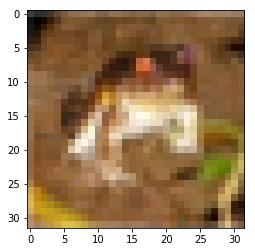

In [31]:
plt.imshow(image.numpy().transpose(1, 2, 0))

## 5. Input pipline for custom dataset

## 5. Input pipline for custom dataset

If we would like to use our custom dataset, it's *highly* recommended that you implement your Dataset subclass. To do this, you simply have to sub class from **torchvision.data.Dataset**, which is an abstract class in which you just need to implement its **\__len__** and **\__getitem__** methods. After that we can simply instantiate our dataset object and pass it to the **DataLoader**'s init, if the arrays' shape and count doesn't change (same number of data points with same shape), we could leave the rest as it is.

In [ ]:
# You should build custom dataset as below.
class CustomDataset(data.Dataset):
    def __init__(self):
        # TODO
        # 1. Initialize file path or list of file names. 
        pass
    def __getitem__(self, index):
        # TODO
        # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open).
        # 2. Preprocess the data (e.g. torchvision.Transform).
        # 3. Return a data pair (e.g. image and label).
        pass
    def __len__(self):
        # You should change 0 to the total size of your dataset.
        return 0 

# Then, you can just use prebuilt torch's data loader. 
custom_dataset = CustomDataset()
train_loader = torch.utils.data.DataLoader(dataset=custom_dataset,
                                           batch_size=100, 
                                           shuffle=True,
                                           num_workers=2)

## 6. Using pretrained model

## 6. Using pretrained model

We can now see how fast is to download and use a relatively small pretrained model achieving good results on ImageNet (1000 classes, >200GB images)

In [32]:
# Download and load pretrained resnet.
resnet = torchvision.models.resnet18(pretrained=True)

# If you want to finetune only top layer of the model.
for param in resnet.parameters():
    param.requires_grad = False
    
# Replace top layer for finetuning.
resnet.fc = nn.Linear(resnet.fc.in_features, 100)  # 100 is for example.

# For test.
images = Variable(torch.randn(10, 3, 224, 224))
outputs = resnet(images)
print (outputs.size())   # (10, 100)

torch.Size([10, 100])


## 7. Save and load model



## 7. Save and load model

Finally, we see how to save and load models' parameters.

In [ ]:
# Save and load the entire model.
torch.save(resnet, 'model.pth')
model = torch.load('model.pth')

# Save and load only the model parameters(recommended).
torch.save(resnet.state_dict(), 'params.pth')
resnet.load_state_dict(torch.load('params.pth'))

We could also store a nested dictionary like this

    state = {
        'm1':m1.state_dict(), 
        'm2': m2.state_dict(), 
        'current_epoch': epoch, 
        'current_loss':loss_value, 
        'optim1':optim1.state_dict()
    } 

by simply runnning `torch.save(state, 'checkpoint.pth')`, and loading it with 


    checkpoint = torch.load('checkpoint.pth')
    m1.load_state_dict(checkpoint['m1'])
    [...]